### 선형회귀분석 오류
* 곤충질량(g)에 따라 암수구분하는 모델 생성
* 0 : 암컷 / 1: : 수컷

In [1]:
wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

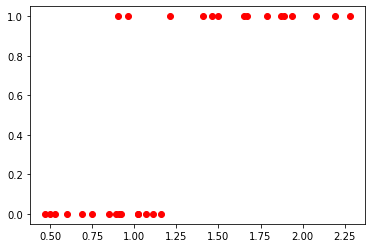

In [4]:
# 시각화
plt.plot(wght,spcs, 'ro')

In [5]:
# 선형회귀분석
lr = LinearRegression()
lr.fit(np.array(wght).reshape(-1,1), spcs)

LinearRegression()

In [6]:
lr.coef_, lr.intercept_

(array([0.74825276]), -0.43007818056050295)

In [7]:
pred = lr.predict(np.array(wght).reshape(-1,1))
r2_score(spcs,pred)

0.6140660982944375

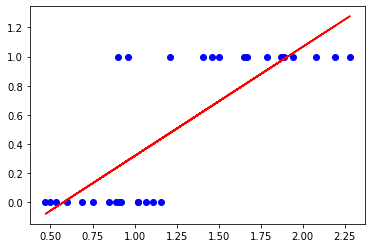

In [8]:
plt.plot(wght, spcs, 'bo')
plt.plot(wght, pred, 'r-')

### 종속변수가 범주형인 경우
* 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
    + ### $ y = ax + b $
* 즉, 우변값의 범위는 <span style=color:green>'-무한대 ~ +무한대'</span> 이지만, 좌변값의 범위는<span style=color:green>'0 ~ 1'</span>임
* 따라서, 좌변값의 범위를 우변과 동일하게 <span style=color:green>'-무한대 ~ +무한대'</span>로 하려면 적절한 변환함수가 필요 
    + 로짓함수를 이용해서 변환함
    + ### $ f(x) = \frac {1} {1 + e^{-x}} $

In [9]:
# 로짓함수 정의
def logistic(x,w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy

In [10]:
# 로짓함수를 이용해서 다시 그래프를 그림
W = [8,-10] # 기울기와 절편을 임의로 설정
xx = np.linspace(0.5, 2.25, 50) # 0.5~2.25내 50개 값생성
yy = logistic(xx, W)

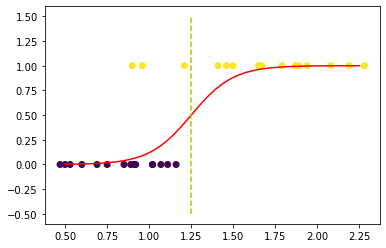

In [11]:
plt.scatter(pd.Series(wght), pd.Series(spcs), c=spcs)
# plt.plot(wght, spcs, 'bo')
plt.plot(xx.reshape(-1,1), yy, 'r-')
# 결정경계 표시 (yy가 0.5이상되는 지점 알아냄)
i = np.min( np.where(yy >= 0.5) )
xp = (xx[i])
plt.plot([xp,xp], [-.5,1.5], 'y--')

In [12]:
# sklearn에서 제공하는 LogisticRegression으로 분석하기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
X = np.array(wght).reshape(-1,1)
y = spcs

In [14]:
# solver : sklearn 20.x 이상부터는 명시적 지정 필요
# liblinear : 이항회귀, 비교적 작은 데이터셋에 적합 ( 0 또는 1 같은걸 분석할떄 )
# lbfgs, newton-cg : 다항회귀, L1제약
# sag, saga : 다항회귀, L2제약, 확률적 경사하강법 사용
# multi_class : 'multinomial' # 다항회귀 설정
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X,y)
pred = lrclf.predict(X)

In [15]:
accuracy_score(y,pred)

0.8666666666666667

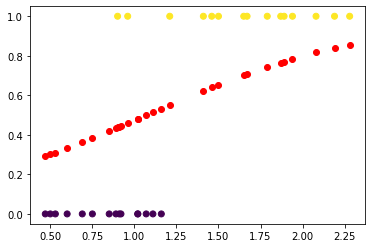

In [16]:
plt.scatter(X,y, c=y)
yy = lrclf.predict_proba(X) # 0,1일 확률
plt.plot(X,yy[:,1], 'ro')

임계값: [1.07142857]


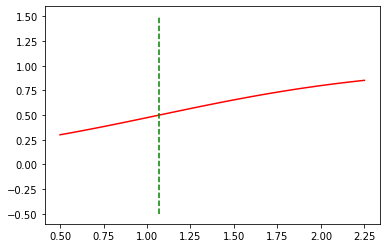

In [17]:
xx = np.linspace(0.5,2.25,50).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx,yy[:,1], 'r-')
i = np.min(np.where(yy[:,1] >= 0.5))
xp = xx[i]
plt.plot([xp,xp], [-.5, 1.5], 'g--')
print('임계값:',xp)

### iris 데이터셋을 이용한 로지스틱회귀
* 4+1 변수, 150개 데이터로 구성
* 결과값은 3가지 : setosa, versicolor, verginica

In [18]:
# 꽃잎너비, 레이블이 verginica인 경우에 대한 경계값 알아보기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [19]:
iris = load_iris()

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify=iris.target, random_state=2111091510)

In [21]:
lrclf = LogisticRegression(solver='sag',multi_class='multinomial', C=0.01)

In [22]:
lrclf.fit(Xtrain,ytrain)
pred = lrclf.predict(Xtest)

In [23]:
accuracy_score(ytest, pred)

0.8444444444444444

In [24]:
X = iris.data[:,3] # petal width
y = (iris.target == 2).astype(np.int32)

In [25]:
np.min(X), np.max(X)
y[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [26]:
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X.reshape(-1,1),y)

LogisticRegression(solver='liblinear')

임계값: [1.61616162]


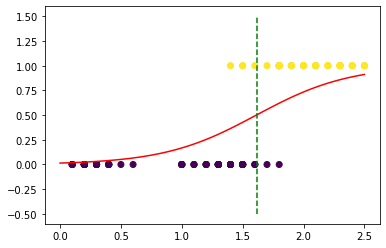

In [27]:
plt.scatter(X,y, c=y)
xx = np.linspace(0,2.5,100).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx,yy[:,1],'r')
i = np.min(np.where(yy[:,1] >= 0.5))
xp = xx[i]
plt.plot([xp,xp], [-.5, 1.5], 'g--')
print('임계값:',xp)

### 결정경계 시각화
* iris의 feature를 2개로 나눠 재학습

In [28]:
# 시각화를 위해 두 변수만 지정
data = iris.data[:,:2] # Sepal 속성만
# data = iris.data[:,2:] # Pepal 속성만

target = iris.target

In [29]:
# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data,target)
print(lrclf.score(data, target)) # 훈련정확도

0.82


In [30]:
plt.rcParams['pcolor.shading'] = 'nearest'

In [31]:
# 다항로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5

In [32]:
# x/y 축 범위의 값들 생성
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [33]:
# 생성한 값들을 x,y쌍으로 좌표평면에 배치
# 즉, 예측값을 나타낼 데이터 범위 지정
xx, yy = np.meshgrid(xm,ym)
xx[:1]
yy[:1]

array([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5

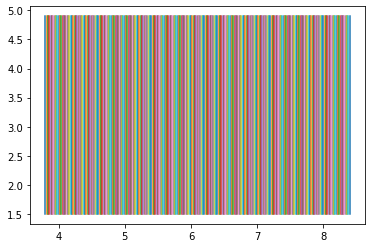

In [34]:
# 지금까지의 작업 확인
plt.plot(xx,yy)
plt.show()

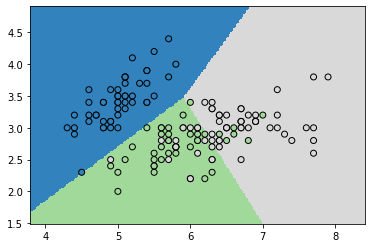

In [35]:
# 위에서 만든 x,y 좌표쌍을 모델을 통해 예측함
# pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수
# pcolormesh(x좌표,y좌표, 색상값, 칼라맵)
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)
# 원본데이터를 산점도에 표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

In [36]:
# 시각화를 위해 두 변수만 지정 (Pepal)
# data = iris.data[:,:2] # Sepal 속성만
data = iris.data[:,2:] # Pepal 속성만

target = iris.target

In [37]:
# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data,target)
print(lrclf.score(data, target)) # 훈련정확도

0.9666666666666667


In [38]:
# 다항로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5

In [39]:
# x/y 축 범위의 값들 생성
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [40]:
# 생성한 값들을 x,y쌍으로 좌표평면에 배치
# 즉, 예측값을 나타낼 데이터 범위 지정
xx, yy = np.meshgrid(xm,ym)
xx[:1]
yy[:1]

array([[-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, 

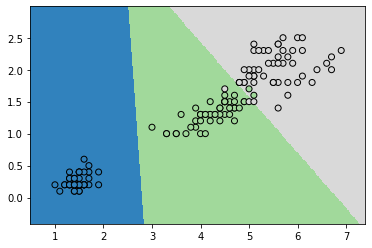

In [41]:
# 위에서 만든 x,y 좌표쌍을 모델을 통해 예측함
# pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수
# pcolormesh(x좌표,y좌표, 색상값, 칼라맵)
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)
# 원본데이터를 산점도에 표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

In [42]:
# 결정영역 시각화 관련파일
# mldlpy3.py

In [44]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


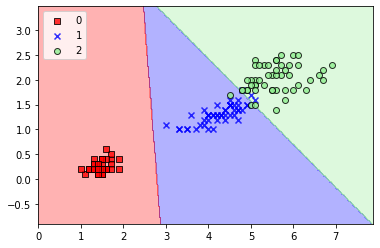

In [45]:
mldlpy3.plot_decision_regions(data,target,lrclf)